In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\bhara\Downloads\salarydata.csv")

# Data Exploration


In [3]:
train.shape


(32561, 14)

In [4]:
train.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train.describe()


,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


# Data Cleaning


In [7]:
# drop uneeded columns
train.drop('education', inplace=True, axis=1)
train.drop('capital-gain', inplace=True, axis=1)
train.drop('capital-loss', inplace=True, axis=1)
train.drop('relationship', inplace=True, axis=1)
train.drop('race', inplace=True, axis=1)
train.drop('native-country', inplace=True, axis=1)
train.drop('marital-status', inplace=True, axis=1)
train.columns.tolist()

['age',
 'workclass',
 'education-num',
 'occupation',
 'sex',
 'hours-per-week',
 'salary']

In [8]:
#We have dropped the education feature since it is a duplicate feature of education_num, but in a nonnumerical format.


In [9]:
# check for nulls
train.isna().sum()

age               0
workclass         0
education-num     0
occupation        0
sex               0
hours-per-week    0
salary            0
dtype: int64

In [10]:
#It appears that there are no null values occurred in the dataset.

In [11]:
# check duplicates and remove it
print("Before removing duplicates:", train.duplicated().sum())

train = train[~train.duplicated()]

print("After removing duplicates:", train.duplicated().sum())

Before removing duplicates: 9410
After removing duplicates: 0


In [12]:
# There are 3465 duplicate rows in our dataset. So, we remove them to make the data more realistic and free-error.

In [13]:
# before discarding
train.sex.value_counts()

Male      15431
Female     7720
Name: sex, dtype: int64

In [14]:
# discard spaces from entries
columns = ['workclass', 'occupation', 'sex', 'salary']
for column in columns:
    train[column] = train[column].str.strip()

In [15]:
# after discarding
train.sex.value_counts()

Male      15431
Female     7720
Name: sex, dtype: int64

In [16]:
#Discarding the spaces from the entries of the dataset, for easier access.

In [17]:

train.workclass.value_counts()

Private             14425
Self-emp-not-inc     2349
Local-gov            1822
?                    1408
State-gov            1196
Self-emp-inc         1056
Federal-gov           874
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
# changing "?" to Unknown
change_columns = ['workclass', 'occupation']
for column in change_columns:
        train[column] = train[column].replace({'?': np.nan })

In [19]:
# after changing "?"
train.workclass.value_counts()

Private             14425
Self-emp-not-inc     2349
Local-gov            1822
State-gov            1196
Self-emp-inc         1056
Federal-gov           874
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [20]:
#Changing "?" symbol to "Unknown", for better interpretation and cleaner representation

In [21]:
train.isna().sum()

age                  0
workclass         1408
education-num        0
occupation        1415
sex                  0
hours-per-week       0
salary               0
dtype: int64

train.fillna(train['workclass'].mode()[0], inplace = True)

In [22]:
train

,age,workclass,education-num,occupation,sex,hours-per-week,salary
0,39,State-gov,13,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Male,40,<=50K
4,28,Private,13,Prof-specialty,Female,40,<=50K
...,...,...,...,...,...,...,...
32553,32,Private,14,Tech-support,Male,11,<=50K
32554,53,Private,14,Exec-managerial,Male,40,>50K
32555,22,Private,10,Protective-serv,Male,40,<=50K
32556,27,Private,12,Tech-support,Female,38,<=50K


In [23]:
categorical_columns_with_null = ['workclass','occupation']
for col in categorical_columns_with_null:
    train[col] = train[col].fillna(train[col].mode()[0])

In [24]:
train.isna().sum()

age               0
workclass         0
education-num     0
occupation        0
sex               0
hours-per-week    0
salary            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x211ecfcdb20>,
 'caps': [<matplotlib.lines.Line2D at 0x211ecfe7130>,
 'boxes': [<matplotlib.lines.Line2D at 0x211ecfcd9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x211ecfe76d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x211ecfe79a0>],
 'means': []}

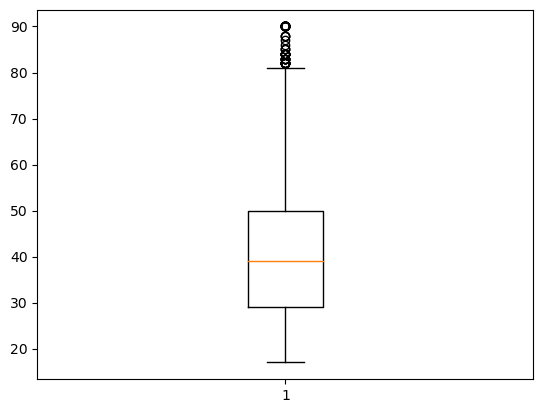

In [25]:
plt.boxplot(train['age'])

In [26]:
Q1=np.percentile(train['age'],25,interpolation='midpoint')
Q2=np.percentile(train['age'],50,interpolation='midpoint')
Q3=np.percentile(train['age'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

C:\Users\bhara\AppData\Local\Temp\ipykernel_12808\1914486750.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(train['age'],25,interpolation='midpoint')
C:\Users\bhara\AppData\Local\Temp\ipykernel_12808\1914486750.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(train['age'],50,interpolation='midpoint')
C:\Users\bhara\AppData\Local\Temp\ipykernel_12808\1914486750.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', 

In [27]:
# find the outliers
train.loc[(train['age'] > upper_limit) | (train['age'] < lower_limit)]

,age,workclass,education-num,occupation,sex,hours-per-week,salary
222,90,Private,9,Other-service,Male,40,<=50K
1040,90,Private,9,Other-service,Female,40,<=50K
1168,88,Self-emp-not-inc,15,Prof-specialty,Male,40,<=50K
1935,90,Private,13,Exec-managerial,Male,45,<=50K
2303,90,Private,10,Other-service,Male,35,<=50K
...,...,...,...,...,...,...,...
31855,82,Self-emp-not-inc,9,Farming-fishing,Male,20,<=50K
32277,90,Private,9,Adm-clerical,Female,25,<=50K
32367,90,Local-gov,4,Protective-serv,Male,40,<=50K
32459,85,Private,13,Exec-managerial,Male,3,<=50K


In [28]:
# capping - change the outlier values to upper (or) lower limit values

train.loc[(train['age']>upper_limit), 'age'] = upper_limit
train.loc[(train['age']<lower_limit), 'age'] = lower_limit

Text(0.5, 1.0, 'age')

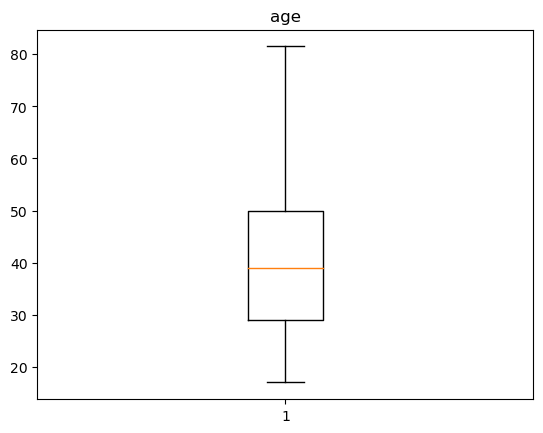

In [29]:
plt.boxplot(train['age'])
plt.title('age')

In [30]:
train

,age,workclass,education-num,occupation,sex,hours-per-week,salary
0,39.0,State-gov,13,Adm-clerical,Male,40,<=50K
1,50.0,Self-emp-not-inc,13,Exec-managerial,Male,13,<=50K
2,38.0,Private,9,Handlers-cleaners,Male,40,<=50K
3,53.0,Private,7,Handlers-cleaners,Male,40,<=50K
4,28.0,Private,13,Prof-specialty,Female,40,<=50K
...,...,...,...,...,...,...,...
32553,32.0,Private,14,Tech-support,Male,11,<=50K
32554,53.0,Private,14,Exec-managerial,Male,40,>50K
32555,22.0,Private,10,Protective-serv,Male,40,<=50K
32556,27.0,Private,12,Tech-support,Female,38,<=50K


{'whiskers': [<matplotlib.lines.Line2D at 0x211ed1731c0>,
 'caps': [<matplotlib.lines.Line2D at 0x211ed173760>,
 'boxes': [<matplotlib.lines.Line2D at 0x211ed164eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x211ed173d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x211ed173fd0>],
 'means': []}

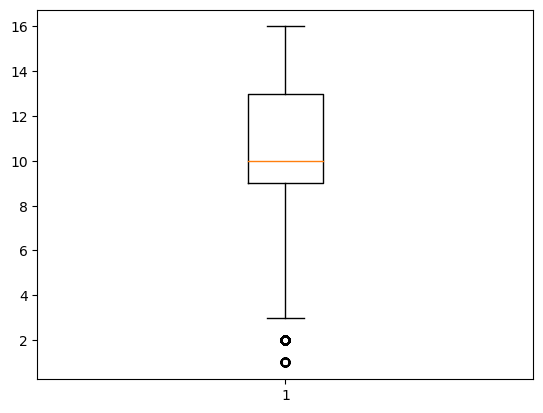

In [31]:
plt.boxplot(train['education-num'])

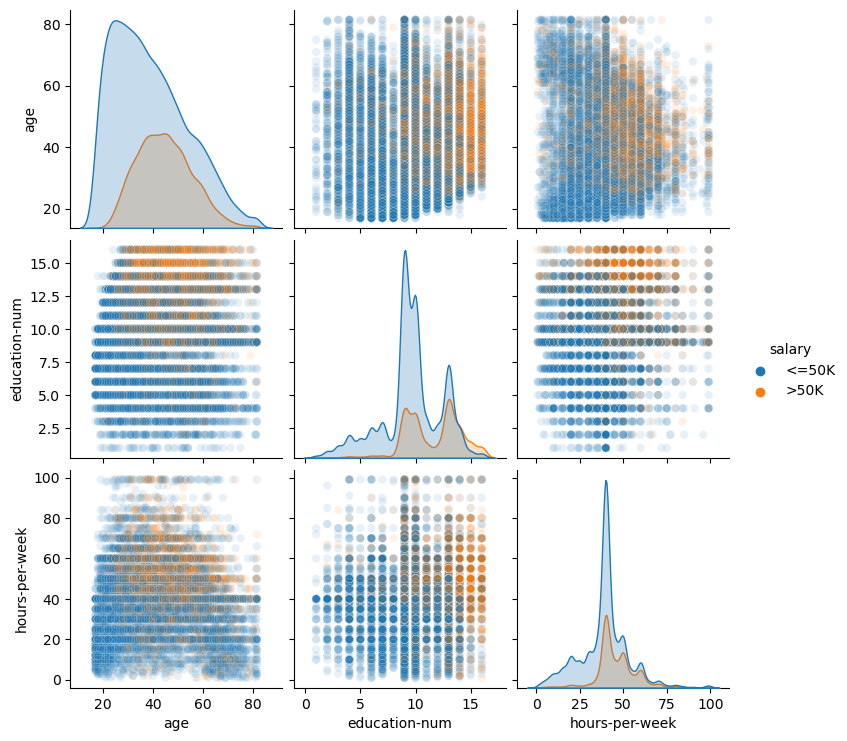

In [32]:
sns.pairplot(train,hue ='salary',plot_kws={'alpha':0.1})

In [33]:
train.corr()

,age,education-num,hours-per-week
age,1.000000,0.018552,0.014449
education-num,0.018552,1.000000,0.132902
hours-per-week,0.014449,0.132902,1.000000


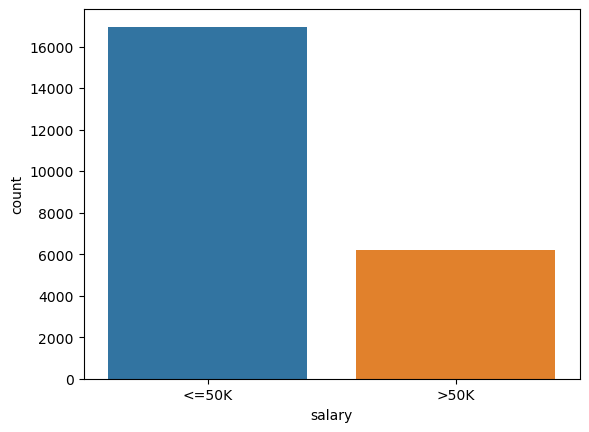

In [34]:
sns.countplot(x="salary", data=train)
plt.savefig('salary.png')

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

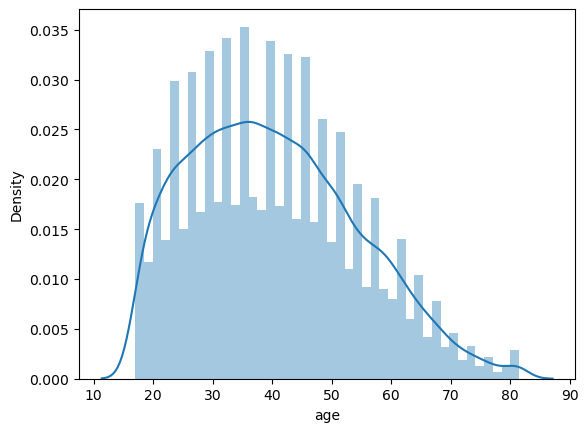

In [35]:
sns.distplot(train['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

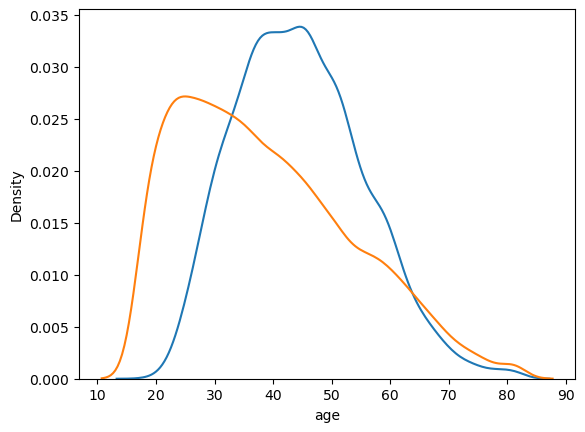

In [36]:
sns.kdeplot(train.age[train['salary'] == '>50K'],label = '>50k')
sns.kdeplot(train.age[train['salary'] == '<=50K'],label = '<=50k')

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

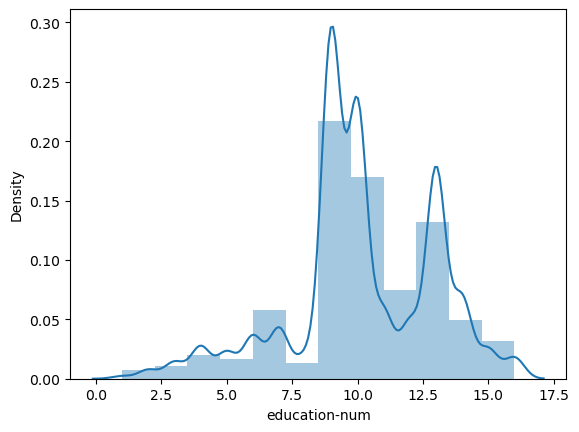

In [37]:
sns.distplot(train['education-num'],bins=12)

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

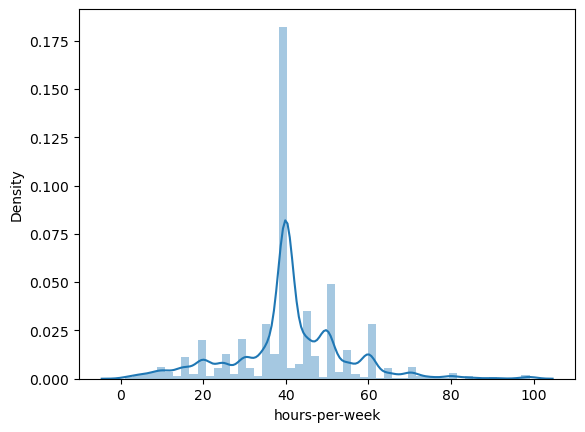

In [38]:
sns.distplot((train['hours-per-week']))

<AxesSubplot:>

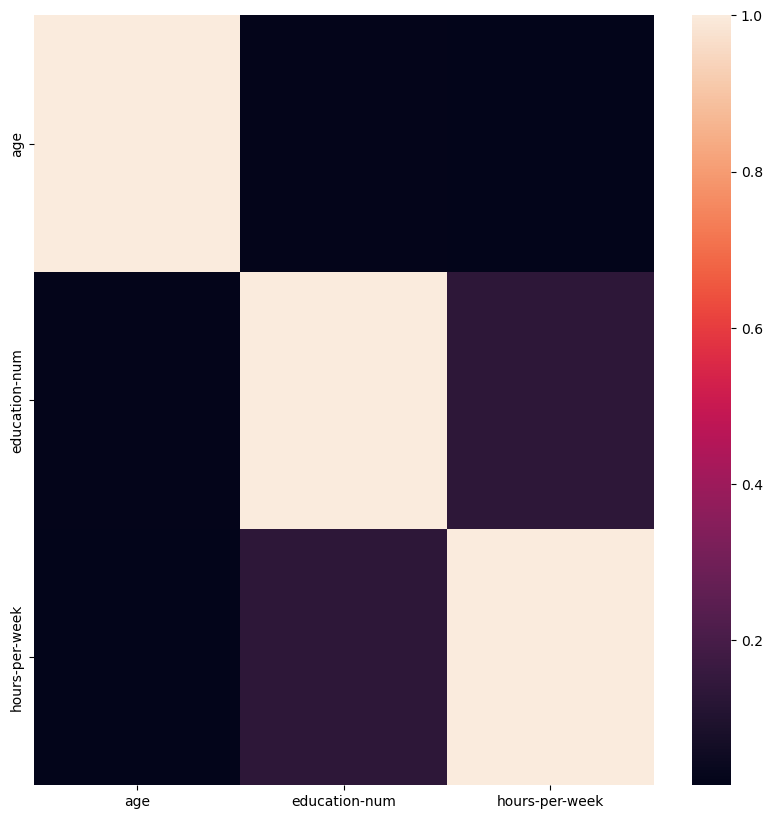

In [39]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)

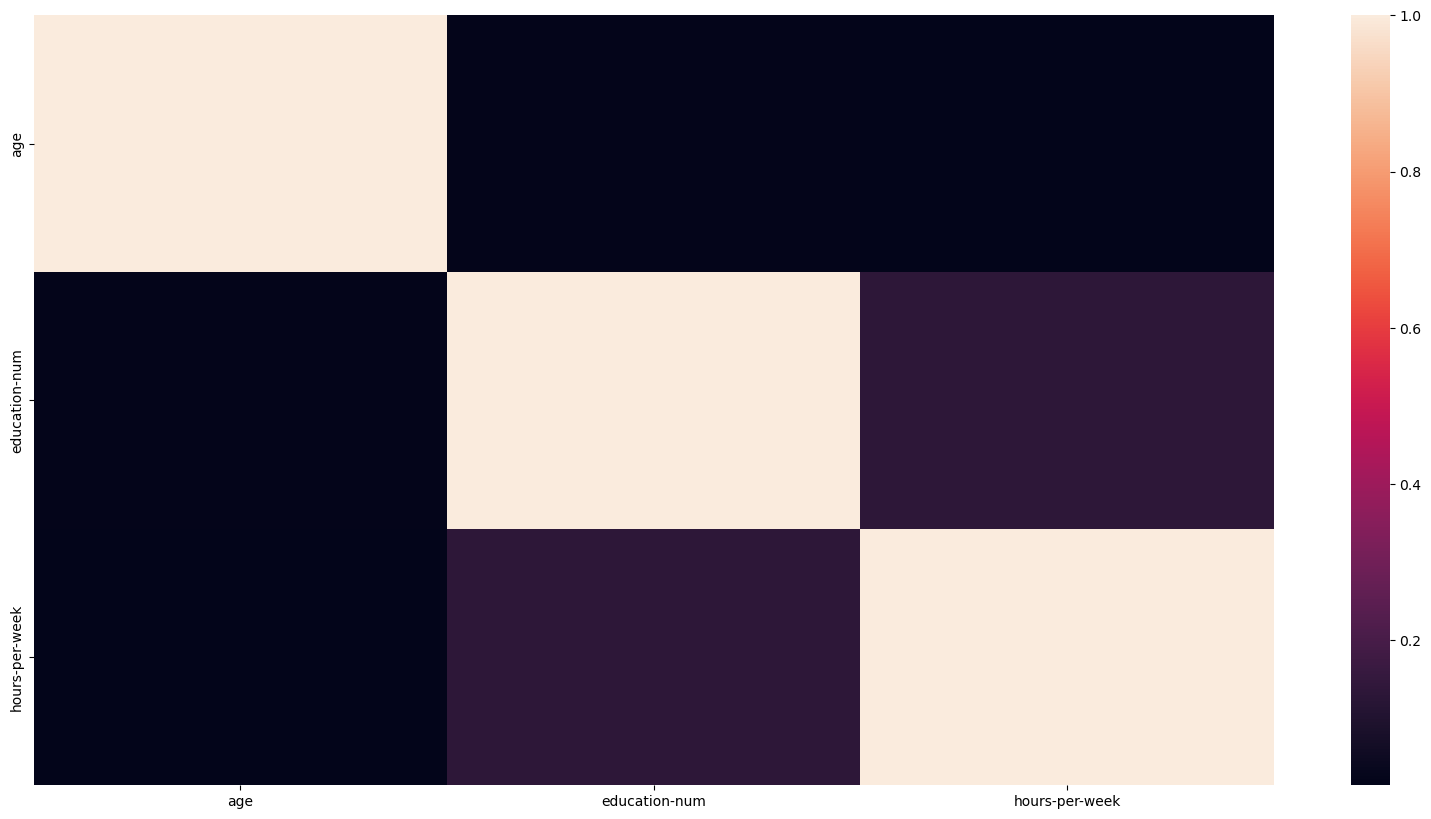

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(data=train.corr())
plt.show()

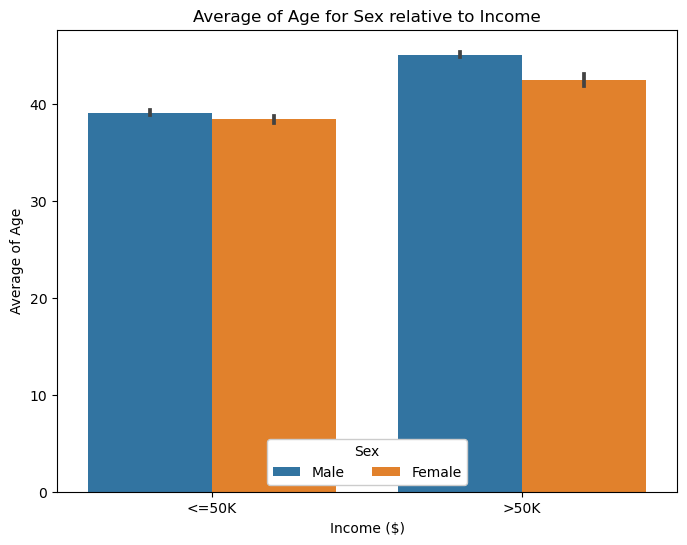

In [41]:


# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sns.barplot(data = train, x = 'salary', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');



the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

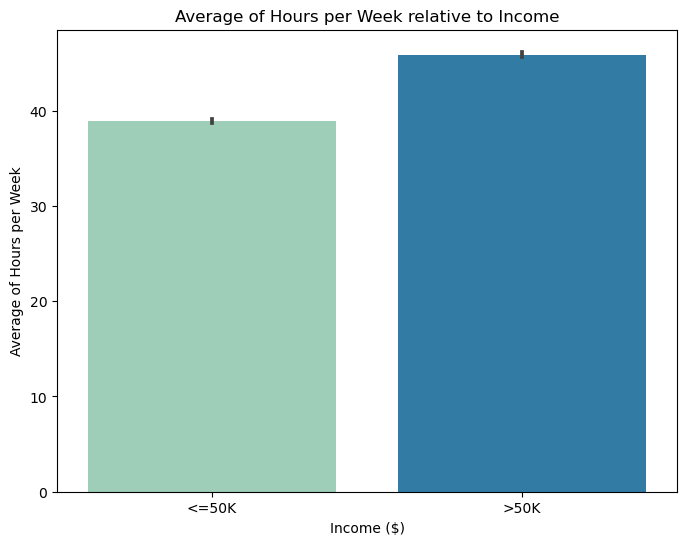

In [42]:
# Bar Chart 
plt.figure(figsize=[8,6])
sns.barplot(data=train, x='salary', y='hours-per-week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

 the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

In [43]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['age',  'hours-per-week']

scaler = MinMaxScaler()
train[numerical] = scaler.fit_transform(train[numerical])

In [44]:
train

,age,workclass,education-num,occupation,sex,hours-per-week,salary
0,0.341085,State-gov,13,Adm-clerical,Male,0.397959,<=50K
1,0.511628,Self-emp-not-inc,13,Exec-managerial,Male,0.122449,<=50K
2,0.325581,Private,9,Handlers-cleaners,Male,0.397959,<=50K
3,0.558140,Private,7,Handlers-cleaners,Male,0.397959,<=50K
4,0.170543,Private,13,Prof-specialty,Female,0.397959,<=50K
...,...,...,...,...,...,...,...
32553,0.232558,Private,14,Tech-support,Male,0.102041,<=50K
32554,0.558140,Private,14,Exec-managerial,Male,0.397959,>50K
32555,0.077519,Private,10,Protective-serv,Male,0.397959,<=50K
32556,0.155039,Private,12,Tech-support,Female,0.377551,<=50K


The data has been scaled to MinMaxScalling for numerical features, which converts the data to have a range between 0 and 1. That would help to make the data well-prepared for the model.

In [45]:
# Encoded Data:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

col = train.columns
for col in train:
    train[col] = label_encoder.fit_transform(train[col])

train.head()

,age,workclass,education-num,occupation,sex,hours-per-week,salary
0,22,6,12,0,1,39,0
1,33,5,12,3,1,12,0
2,21,3,8,5,1,39,0
3,36,3,6,5,1,39,0
4,11,3,12,9,0,39,0


In [46]:
train.head()

,age,workclass,education-num,occupation,sex,hours-per-week,salary
0,22,6,12,0,1,39,0
1,33,5,12,3,1,12,0
2,21,3,8,5,1,39,0
3,36,3,6,5,1,39,0
4,11,3,12,9,0,39,0


# Model Creation

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score

In [48]:

from sklearn.model_selection import train_test_split
# Partioning the data
X = train.drop('salary', axis=1)
y = train['salary']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
logit_model = lr.fit(X_train, y_train)
y_predict_logit = logit_model.predict(X_test)
from sklearn.metrics import accuracy_score
acc_lr= accuracy_score(y_test,y_predict_logit)
print(classification_report(y_test, y_predict_logit))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3431
           1       0.61      0.36      0.45      1200

    accuracy                           0.77      4631
   macro avg       0.71      0.64      0.65      4631
weighted avg       0.75      0.77      0.75      4631



In [50]:
score_logit = f1_score(y_test, y_predict_logit , average = 'weighted')
score_logit

0.7528529494629115

In [51]:
confusion_matrix(y_test,y_predict_logit)

array([[3159,  272],
       [ 771,  429]], dtype=int64)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_clf = rf_clf.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      3431
           1       0.45      0.40      0.42      1200

    accuracy                           0.72      4631
   macro avg       0.63      0.61      0.62      4631
weighted avg       0.71      0.72      0.71      4631



In [55]:
confusion_matrix(y_test,y_pred_clf)

array([[2852,  579],
       [ 722,  478]], dtype=int64)

In [56]:
score_clf = f1_score(y_test, y_pred_clf, average = 'weighted')
score_clf

0.7130349028318906

In [57]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [58]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)

In [59]:
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

[[3134  297]
 [ 678  522]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      3431
           1       0.64      0.43      0.52      1200

    accuracy                           0.79      4631
   macro avg       0.73      0.67      0.69      4631
weighted avg       0.77      0.79      0.78      4631



In [60]:
score_gbc = f1_score(y_test, ypred, average = 'weighted')
score_gbc

0.7751347280436606

In [61]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred_abc = abc.predict(X_test)
print(confusion_matrix(y_test, ypred_abc))
print(classification_report(y_test, ypred_abc))

[[3119  312]
 [ 698  502]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3431
           1       0.62      0.42      0.50      1200

    accuracy                           0.78      4631
   macro avg       0.72      0.66      0.68      4631
weighted avg       0.77      0.78      0.77      4631



In [62]:
score_abc = f1_score(y_test, ypred_abc, average = 'weighted')
score_abc

0.7668120984855101

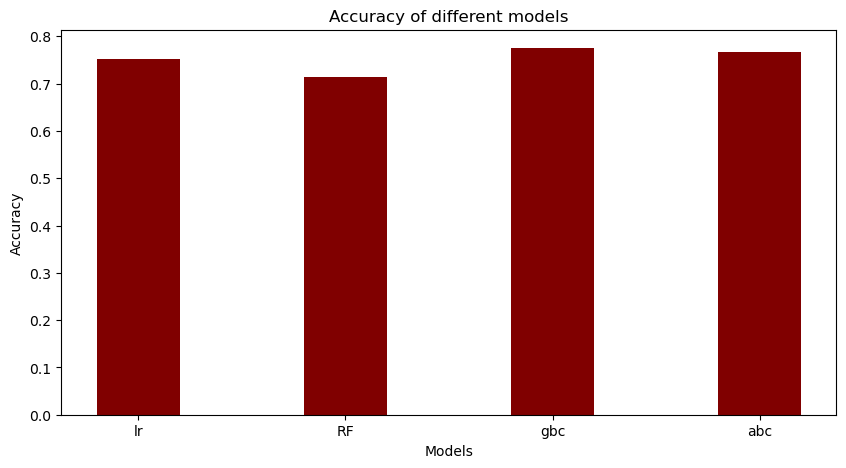

In [63]:
df={'lr':score_logit,'RF':score_clf,'gbc':score_gbc, 'abc':score_abc}
models=list(df.keys())
values=list(df.values())
fig=plt.figure(figsize=(10,5))
plt.bar(models,values,color='maroon',width=0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models")
plt.show()

In [64]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = gbc.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
2,education-num,0.400580
0,age,0.248366
5,hours-per-week,0.136272
4,sex,0.122282
3,occupation,0.073896
1,workclass,0.018603


Text(0.5, 1.0, 'Plot Feature Importances')

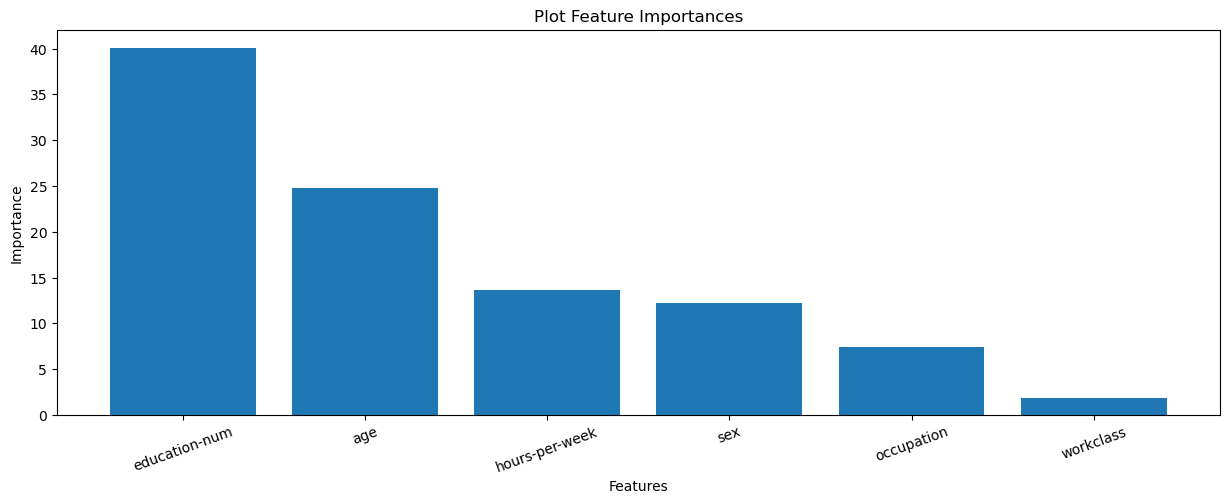

In [65]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

# Save Model

In [66]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(gbc, pickle_out)
pickle_out.close()